In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [8]:
from tensorflow.keras.models import Sequential

In [15]:
import matplotlib.pyplot as plt

In [4]:
train_dir = r'.\..\Dataset\cats_and_dogs_filtered\cats_and_dogs_filtered\train'
val_dir = r'.\..\Dataset\cats_and_dogs_filtered\cats_and_dogs_filtered\validation'

In [5]:
# train_datagen = ImageDataGenerator(
#     rescale=1.0/255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# Load VGG16 Model with ImageNet weights, exclude top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 114s 2us/step


In [9]:
for layer in base_model.layers[:-4]:
    layer.trainable = False

model = Sequential([
    base_model,            
    Flatten(),                           # flatten
    Dense(256, activation='relu'),       # fully connected
    Dropout(0.5),                        # dropout
    Dense(1, activation='sigmoid')       # output layer for binary
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [12]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

Epoch 1/5
63/63 [==============================] - 405s 6s/step - loss: 0.2443 - accuracy: 0.8965 - val_loss: 0.1886 - val_accuracy: 0.9140
Epoch 2/5
63/63 [==============================] - 434s 7s/step - loss: 0.2047 - accuracy: 0.9165 - val_loss: 0.1875 - val_accuracy: 0.9300
Epoch 3/5
63/63 [==============================] - 412s 7s/step - loss: 0.1736 - accuracy: 0.9235 - val_loss: 0.1759 - val_accuracy: 0.9380
Epoch 4/5
63/63 [==============================] - 255s 4s/step - loss: 0.1416 - accuracy: 0.9435 - val_loss: 0.2179 - val_accuracy: 0.9350
Epoch 5/5
63/63 [==============================] - 251s 4s/step - loss: 0.1701 - accuracy: 0.9305 - val_loss: 0.1610 - val_accuracy: 0.9320


In [13]:
test_loss, test_acc = model.evaluate(val_generator, verbose=1)
print(f"Test Accuracy: {test_acc:.2f}")

32/32 [==============================] - 68s 2s/step - loss: 0.1610 - accuracy: 0.9320
Test Accuracy: 0.93


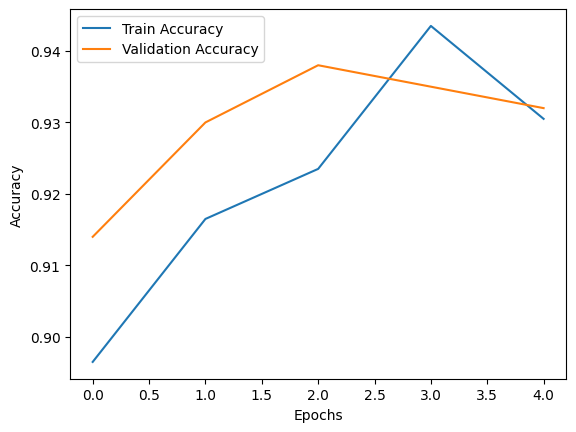

In [19]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()